<a href="https://colab.research.google.com/github/fudasho/colab_sample/blob/main/Simple_deep_learning_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#シンプルなディープラーニング

##データの読み込み

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])
print(iris.target[:10])
print(iris.data.shape)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


In [2]:
from sklearn import preprocessing
from keras.utils import to_categorical

scaler  = preprocessing.StandardScaler()
scaler.fit(iris.data)
x =scaler.transform(iris.data)
print(x[:10])

t=to_categorical(iris.target)
print(t[:10])


[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train,t_test = train_test_split(x, t, train_size=0.75)
print(x_train.shape)
print(x_test.shape)

print(x_train[0])
print(x_test[0])

(112, 4)
(38, 4)
[1.2803405  0.09821729 0.93327055 1.18556721]
[-1.02184904  1.01900435 -1.39706395 -1.18381211]


#モデルの構築

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Activation

model = Sequential()
model.add(Dense(32,input_dim =4 ))
model.add(Activation('relu'))
model.add(Dense(32 ))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,315 (5.14 KB)

 Trainable params: 1,315 (5.14 KB)

 Non-trainable params: 0 (0.00 B)

None


##　学習

In [5]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)


Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2981 - loss: 1.1332
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4900 - loss: 1.0173  
Epoch 3/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5935 - loss: 0.9655 
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7090 - loss: 0.8984 
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7239 - loss: 0.7973 
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7207 - loss: 0.7627 
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6983 - loss: 0.7754 
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7240 - loss: 0.6958 
Epoch 9/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8071 - loss: 0.5677 
Epoch 10/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7945 - loss: 0.5748 
Epoch 11/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7812 - loss: 0.6219 
Epoch 12/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 

##　学習の推移

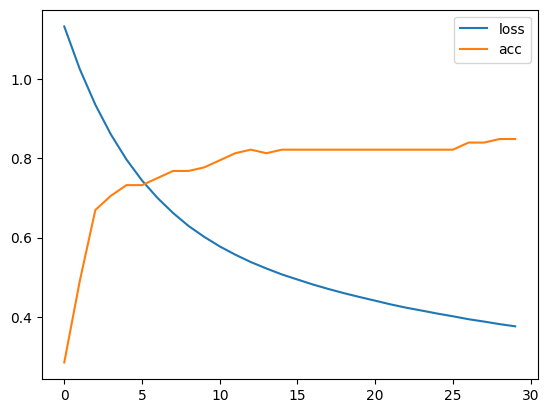

In [8]:
import matplotlib.pyplot as plt

hist_loss= history.history['loss']
hist_acc= history.history['accuracy']

plt.plot(np.arange(len(hist_loss)),hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)),hist_acc, label='acc')

plt.legend()
plt.show()

## 評価

In [9]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 473ms/step - accuracy: 0.9265 - loss: 0.3227
0.3249688744544983 0.9210526347160339


##　予測

In [13]:
model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step


array([[0.97931916, 0.01418726, 0.00649348],
       [0.9777264 , 0.01559171, 0.0066819 ],
       [0.06152172, 0.30734706, 0.63113123],
       [0.07793514, 0.34775186, 0.574313  ],
       [0.92570317, 0.05957409, 0.01472275],
       [0.01305424, 0.12682746, 0.86011827],
       [0.07713173, 0.33643183, 0.5864364 ],
       [0.0701818 , 0.32108685, 0.6087313 ],
       [0.98369724, 0.01107281, 0.00522997],
       [0.972809  , 0.01892976, 0.00826119],
       [0.05070791, 0.32128057, 0.62801147],
       [0.98517954, 0.00977853, 0.00504193],
       [0.0974907 , 0.6242563 , 0.27825296],
       [0.01318401, 0.1277446 , 0.8590714 ],
       [0.16240005, 0.5554208 , 0.28217912],
       [0.07400134, 0.32817715, 0.59782153],
       [0.97161317, 0.02151175, 0.00687502],
       [0.09745205, 0.36828703, 0.5342609 ],
       [0.97553784, 0.0167667 , 0.00769546],
       [0.07223742, 0.36677244, 0.56099015],
       [0.18201299, 0.5238563 , 0.29413068],
       [0.11564446, 0.44940248, 0.43495303],
       [0.

## 保存

In [15]:
from keras.models import load_model
model.save('model.h5')
load_model('model.h5')

<Sequential name=sequential, built=True>